# Networkx Basis
Networkx提供的图类型如下
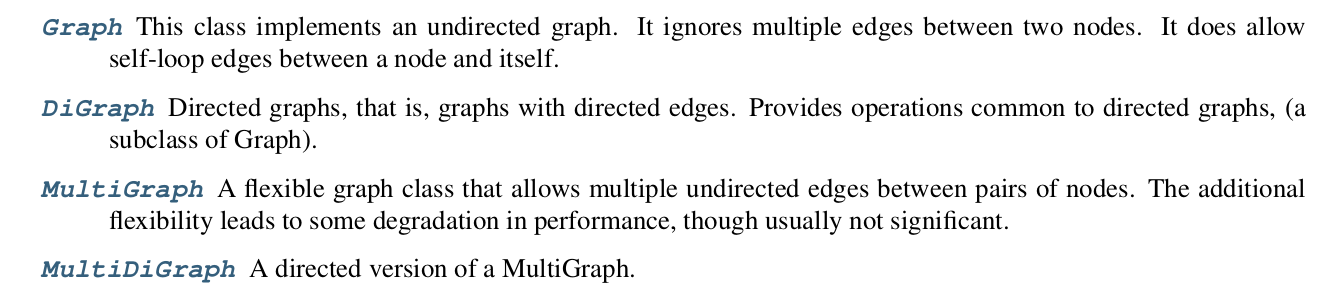
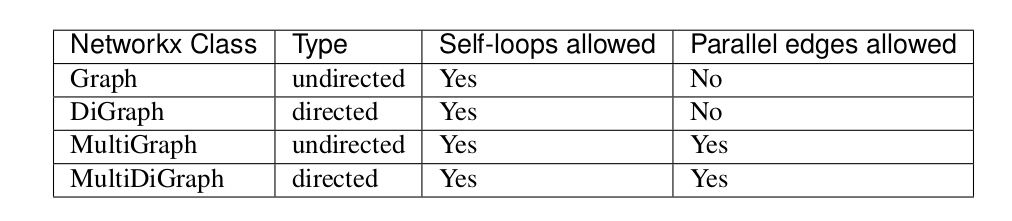

Networkx数据组织方式：**Data Structure**

NetworkX uses a “dictionary of dictionaries of dictionaries” as the basic network data structure.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import networkx as nx; #导入networkx
import numpy as np
G = nx.Graph();
G.add_edge(1, 2);
G.add_edge(2, 3, weight = 0.9); #specify edge weight

## Networkx自带函数
Networkx提供了许多有用的函数，可以用来计算
1. 最短距离
2. 广度优先搜索
3. 聚类算法
4. 同构图

In [3]:
G = nx.Graph()
e = [('a', 'b', 0.3), ('b', 'c', 0.9), ('a', 'c', 0.5), ('c', 'd', 1.2)]
G.add_weighted_edges_from(e)
print(nx.dijkstra_path(G, 'a', 'd'))

['a', 'c', 'd']


## 图显示 
Python中通过`networkx.draw()`函数将当前graph绘制

也可以通过`nx.draw_networkx()`绘制当前网络结构图

In [10]:
?nx.draw_networkx

Signature: nx.draw_networkx(G, pos=None, arrows=True, with_labels=True, **kwds)
Docstring:
Draw the graph G using Matplotlib.

Draw the graph with Matplotlib with options for node positions,
labeling, titles, and many other drawing features.
See draw() for simple drawing without labels or axes.

Parameters
----------
G : graph
   A networkx graph

pos : dictionary, optional
   A dictionary with nodes as keys and positions as values.
   If not specified a spring layout positioning will be computed.
   See :py:mod:`networkx.drawing.layout` for functions that
   compute node positions.

arrows : bool, optional (default=True)
   For directed graphs, if True draw arrowheads.
   Note: Arrows will be the same color as edges.

arrowstyle : str, optional (default='-|>')
    For directed graphs, choose the style of the arrowsheads.
    See :py:class: `matplotlib.patches.ArrowStyle` for more
    options.

arrowsize : int, optional (default=10)
   For directed graphs, choose the size of the arrow 

In [11]:
nx.path_graph?

Signature: nx.path_graph(n, create_using=None)
Docstring:
Returns the Path graph `P_n` of linearly connected nodes.

Parameters
----------
n : int or iterable
    If an integer, node labels are 0 to n with center 0.
    If an iterable of nodes, the center is the first.
create_using : NetworkX graph constructor, optional (default=nx.Graph)
   Graph type to create. If graph instance, then cleared before populated.
File:      e:\anaconda3\envs\sn\lib\site-packages\networkx\generators\classic.py
Type:      function


### Graph Layout
Layouts are node positioning algorithms for graph drawing
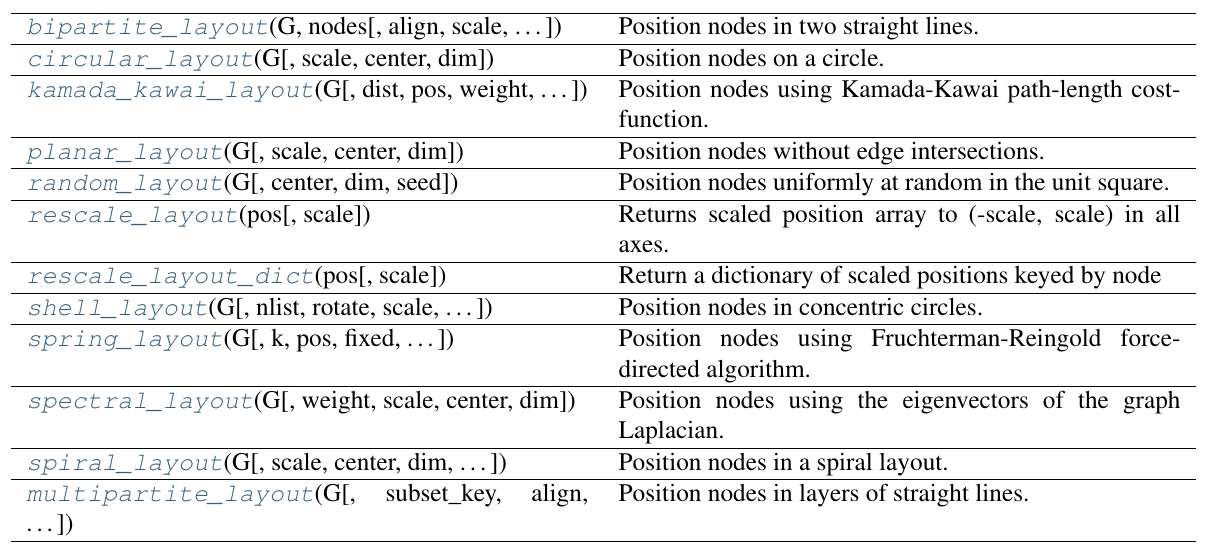
1. nx.spring_layout(
    G,
    k=None,
    pos=None,
    fixed=None,
    iterations=50,
    threshold=0.0001,
    weight='weight',
    scale=1,
    center=None,
    dim=2,
    seed=None,）
2. nx.random_layout(G, center=None, dim=2, seed=None)
> Position nodes uniformly at random in the unit square. For every node, a position is generated by choosing each of coordinates uniformly at random on the interval [0.0, 1.0)

In [15]:
#代码示例
import networkx as nx;
import matplotlib.pyplot as plt
n = 200
seed = 1231;
options = {
    "node_color": range(n),
    "node_size": 50,
    "linewidths": 0,
    "width": 0.1,
    "cmap": plt.cm.Blues
}

<Figure size 432x288 with 0 Axes>

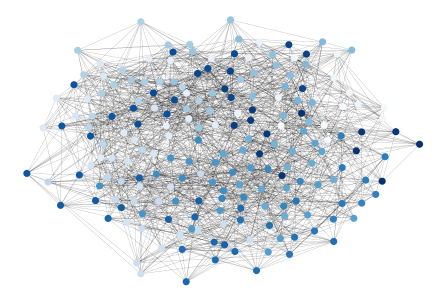

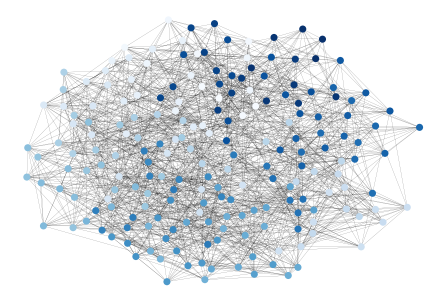

In [16]:
#networkx.drawing.layout.spring_layout
G = nx.generators.random_graphs.newman_watts_strogatz_graph(200, 10, 0.7, seed = seed);
pos8 = nx.spring_layout(G, k = 0.1, seed = seed)
nx.draw(G, pos8, **options);
plt.figure(2)
nx.draw_spring(G, **options)

<AxesSubplot:>

<AxesSubplot:>

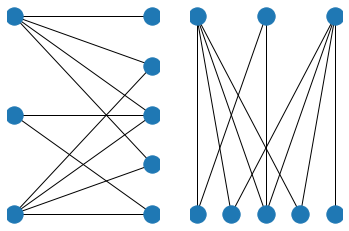

In [17]:
#networkx.drawing.layout.bipartite_layout
G = nx.bipartite.gnmk_random_graph(3, 5, 10, seed=123) #生成一个分别有三和五个顶点，十条边
#的偶图
top = nx.bipartite.sets(G)[0];
pos1 = nx.bipartite_layout(G, top);
plt.subplot(121)
nx.draw(G, pos1);
pos2 = nx.bipartite_layout(G, top, align = 'horizontal')
plt.subplot(122)
nx.draw(G, pos2)

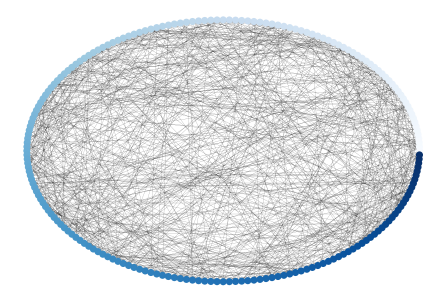

In [18]:
#networkx.drawing.layout.circular_layout
G = nx.generators.random_graphs.newman_watts_strogatz_graph(200, 10, 0.7, seed = seed);
pos3 = nx.circular_layout(G)

nx.draw(G, pos3, **options)

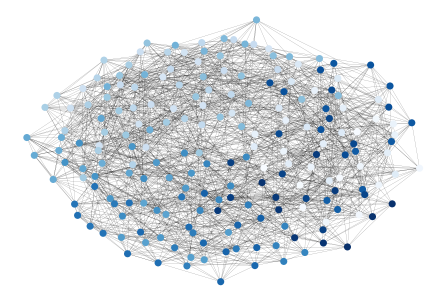

In [19]:
#networkx.drawing.layout.kamada_kawai_layout
pos4 = nx.kamada_kawai_layout(G);
nx.draw(G, pos4, **options)

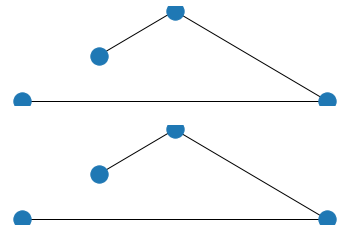

In [20]:
# networkx.drawing.layout.planar_layout
G2 = nx.path_graph(4);
plt.subplot(211);
nx.draw_planar(G2);
pos5 = nx.planar_layout(G2);
plt.subplot(212);
nx.draw(G2, pos5);

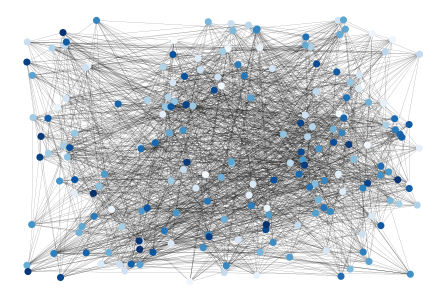

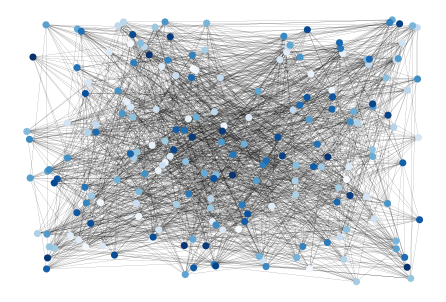

In [21]:
# networkx.drawing.layout.random_layout
plt.figure(1);
nx.draw_random(G, **options) #直接绘制random
pos6 = nx.random_layout(G );
plt.figure(2);
nx.draw(G, pos6, **options);

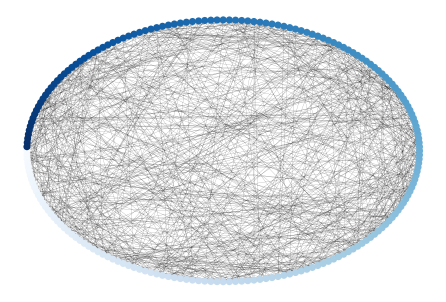

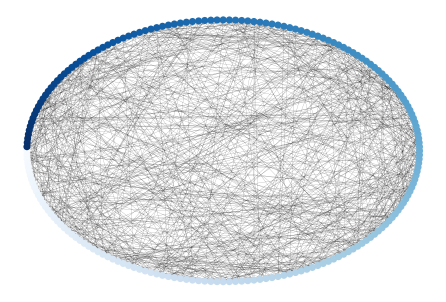

In [22]:
#networkx.drawing.layout.shell_layout
plt.figure(1)
nx.draw_shell(G, **options);
plt.figure(2)
pos7 = nx.shell_layout(G)
nx.draw(G, pos7, **options);

<Figure size 432x288 with 0 Axes>

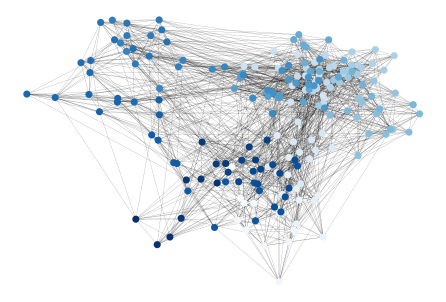

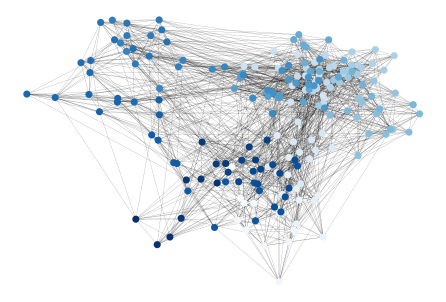

In [23]:
# networkx.drawing.layout.spectral_layout
nx.draw_spectral(G,  **options)
plt.figure(2)
pos10 = nx.spectral_layout(G, scale = 5);
nx.draw(G, pos10, **options)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

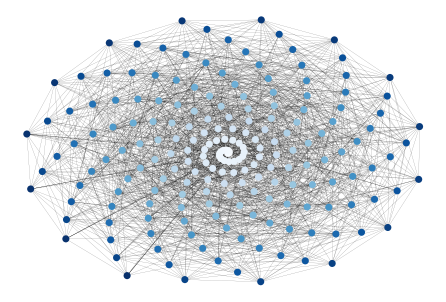

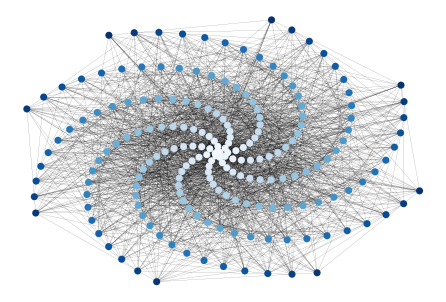

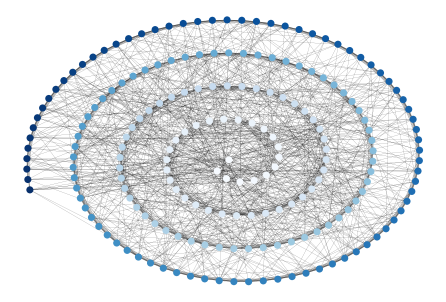

In [24]:
#networkx.drawing.layout.spiral_layout
#绘制螺旋图
pos11 = nx.spiral_layout(G, resolution = 0.4);
nx.draw(G, pos11, **options)
pos12 = nx.spiral_layout(G, resolution = 0.8);
plt.figure(2)
nx.draw(G, pos12, **options)
pos13 = nx.spiral_layout(G, resolution = 0.8, equidistant=True);
plt.figure(3)
nx.draw(G, pos13, **options)

## 图的操作
节点和边的属性：

Each graph, node, and edge can hold key/value attribute pairs in an associated attribute dictionary (the keys must be hashable). By default these are empty, but can be added or changed using `add_edge`, `add_node `or direct manipulation of the attribute dictionaries named graph, node and edge respectively.

### 节点和边属性设置
1. 节点的属性设置： Add note attributes using `add_node()`, `add_nodes_from()`  or `G.nodes`
2. 边的属性设置：Add edge attributes using `add_edge()`,` add_edges_from()`, subscript notation, or `G.edges`.
3. `G.clear()`移除所有的节点和边

In [25]:
import networkx as nx;

G = nx.Graph(day = "Friday");
G.graph

{'day': 'Friday'}

In [26]:
G.add_node(1, time="5pm")
G.add_nodes_from([3, 1], time="2pm")
G.nodes[1]
G.nodes[1]["room"] = 714 # node must exist already to use G.nodes
# del G.nodes[1]["room"] # remove attribute
list(G.nodes(data=True))
list(G.nodes(data = "time"))

{'time': '2pm'}

[(1, {'time': '2pm', 'room': 714}), (3, {'time': '2pm'})]

[(1, '2pm'), (3, '2pm')]

In [27]:
list(G.nodes(data = "room", default = "No mattching room"))

[(1, 714), (3, 'No mattching room')]

In [28]:
list(G.nodes())# 如果不加参数data = Ture就只显示节点编号，加了参数就显示节点的attributes
list(G.nodes(data = True))# 如果不加参数data = Ture就只显示节点编号，加了参数就显示节点的attributes

[1, 3]

[(1, {'time': '2pm', 'room': 714}), (3, {'time': '2pm'})]

In [29]:
# Add edge attributes using add_edge(), add_edges_from(), subscript notation, or G.edges.
G.add_edge(1, 2, weight=4.7)
G.add_edges_from([(3, 4), (4, 5)], color="red")
G.add_edges_from([(1, 2, {"color": "blue"}), (2, 3, {"weight": 8})])
G[1][2]["weight"] = 4.7
G.edges[1, 2]["weight"] = 4
list(G.edges(data = True))

[(1, 2, {'weight': 4, 'color': 'blue'}),
 (3, 4, {'color': 'red'}),
 (3, 2, {'weight': 8}),
 (4, 5, {'color': 'red'})]

In [30]:
G.adj
G.number_of_edges()
G.number_of_nodes()

AdjacencyView({1: {2: {'weight': 4, 'color': 'blue'}}, 3: {4: {'color': 'red'}, 2: {'weight': 8}}, 2: {1: {'weight': 4, 'color': 'blue'}, 3: {'weight': 8}}, 4: {3: {'color': 'red'}, 5: {'color': 'red'}}, 5: {4: {'color': 'red'}}})

4

5

### 图的基本属性
图的四个基本属性：
1. G.nodes()
2. G.edges()
3. G.adj
4. G.degree #返回结果是字典类型，key = 节点 value = 节点的度
5. G.number_of_edges()
6. G.number_of_nodes()

These are set-like views of the **nodes, edges, neighbors (adjacencies), and degreesof nodes** in a
graph.

Fast examination of all (node, adjacency) pairs is achieved using `G.adjacency()`, or`G.adj.items()`. Note that for undirected graphs, adjacency iteration sees each edge twice.
1. G.adj.items()  #显示当前图所有节点对应的节点及连接边权重。格式为{sourceNode:{destNode1:{'weight': weightValue1}, destNode2:{'weight': weightValue2}}}

In [31]:
import networkx as nx

#图的节点和边定义
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam") # adds node "spam"
G.add_nodes_from("spam") # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')
#显示图的属性
list(G.nodes)
list(G.edges)
list(G.adj[1])
list(G.neighbors(2))
G.degree 
list(G.degree)
G.number_of_edges()
G.number_of_nodes()

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

[(1, 2), (1, 3), (3, 'm')]

[2, 3]

[1]

DegreeView({1: 2, 2: 1, 3: 2, 'spam': 0, 's': 0, 'p': 0, 'a': 0, 'm': 1})

[(1, 2), (2, 1), (3, 2), ('spam', 0), ('s', 0), ('p', 0), ('a', 0), ('m', 1)]

3

8

In [32]:
#fast examination of all(node, adjacency)
import networkx as nx;

FG = nx.Graph();
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
FG.adj.items()

ItemsView(AdjacencyView({1: {2: {'weight': 0.125}, 3: {'weight': 0.75}}, 2: {1: {'weight': 0.125}, 4: {'weight': 1.2}}, 3: {1: {'weight': 0.75}, 4: {'weight': 0.375}}, 4: {2: {'weight': 1.2}, 3: {'weight': 0.375}}}))

In [33]:
a = {1: {2: {'weight': 0.125}, 3: {'weight': 0.75}}, 2: {1: {'weight': 0.125}, 4: {'weight': 1.2}}, 3: {1: {'weight': 0.75}, 
                        4: {'weight': 0.375}}, 4: {2: {'weight': 1.2}, 3: {'weight': 0.375}}}
for i1, i2 in a.items():
    print(i1, i2)
    
for k1 in a.keys():
    print(k1)

1 {2: {'weight': 0.125}, 3: {'weight': 0.75}}
2 {1: {'weight': 0.125}, 4: {'weight': 1.2}}
3 {1: {'weight': 0.75}, 4: {'weight': 0.375}}
4 {2: {'weight': 1.2}, 3: {'weight': 0.375}}
1
2
3
4


In [34]:
for n, nbrs in FG.adj.items():
        for nbr, eattr in nbrs.items():
            wt = eattr['weight']#得到边对应的权重
            print(f"({n}, {nbr}, {wt:.3})")
print("The edge data will be shown:")
list(FG.edges.data('weight'))
for (u, v, wt) in FG.edges.data('weight'):
    print(f"({u}, {v}, {wt:.3})")#输出流控制

(1, 2, 0.125)
(1, 3, 0.75)
(2, 1, 0.125)
(2, 4, 1.2)
(3, 1, 0.75)
(3, 4, 0.375)
(4, 2, 1.2)
(4, 3, 0.375)
The edge data will be shown:


[(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)]

(1, 2, 0.125)
(1, 3, 0.75)
(2, 4, 1.2)
(3, 4, 0.375)


### Removing elements from a graph
One can remove nodes and edges from the graph in a similar fashion to adding. 
Use methods 
1. `Graph.remove_node()`
2. `Graph.remove_nodes_from()`
3. `Graph.remove_edge()`
4. `Graph.remove_edges_from()`

In [35]:
list(G.nodes) #移除节点2之前的节点列表
G.remove_node(2)
G.remove_nodes_from("spam")
list(G.nodes)#移除部分节点后的节点列表
G.remove_edge(1, 3)


[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

[1, 3, 'spam']

###  Adding attributes to graphs, nodes, and edges
Attributes such as weights, labels, colors, or whatever Python object you like, can be attached to graphs, nodes, or edges.

Attributes can be added or changed using `add_edge`, `add_node`, `add_nodes_from` or direct manipulation of the attribute dictionaries named `G.graph`,` G.nodes`, and` G.edges `for a graph G.

In [36]:
import networkx as nx;

G = nx.Graph(day="Friday")#Assign graph attributes when creating a new graph
G.graph
G.graph['day'] = "Monday" #modify attributes
G.graph

G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]
G.nodes[1]['room'] = 714 #adding extra attribute to node 1
G.nodes.data()

G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G.edges.data()
G[1][2]['weight'] = 4.4
G.edges[3, 4]['weight'] = 4.2
G.edges.data()
G.edges.data('color')
G.edges.data('weight')

{'day': 'Friday'}

{'day': 'Monday'}

{'time': '5pm'}

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

EdgeDataView([(1, 2, {'weight': 4.7, 'color': 'blue'}), (3, 4, {'color': 'red'}), (3, 2, {'weight': 8}), (4, 5, {'color': 'red'})])

EdgeDataView([(1, 2, {'weight': 4.4, 'color': 'blue'}), (3, 4, {'color': 'red', 'weight': 4.2}), (3, 2, {'weight': 8}), (4, 5, {'color': 'red'})])

EdgeDataView([(1, 2, 'blue'), (3, 4, 'red'), (3, 2, None), (4, 5, 'red')])

EdgeDataView([(1, 2, 4.4), (3, 4, 4.2), (3, 2, 8), (4, 5, None)])

## 有向图的属性设置
在networkx中，有向图`DiGraph`的属性相关函数如下
1. DiGraph.out_edges
2. DiGraph.in_degree
3. DiGraph.predecessors()
4. DiGraph.successors(node) #当前节点node指向的其他节点，与DiGraph.neighbors(node)相同
5. DiGraph.degree(node) #等于出度和入度之和
6. Graph.to_undirected()  或者 networkx.Graph(directedGraph) #将有向图转换为无向图

## 图的其他结构属性
The structure of G can be analyzed using various graph-theoretic functions such as:
1. nx.connected_components(Graph)#得到当前图的每个连通分支的节点
2. nx.clustering(Graph)#得到当前图的每个节点的clustering
3. nx.average_clustering(G)#完成平均群聚系数的计算
4. nx.clustering(G)#可以计算各个节点的集聚系数
5. nx.diameter(G)#返回图G的直径
6. nx.average_shortest_path_length(G)#返回图G所有节点间平均最短路径长度
7. nx.is_directed(G)#如果图是有向的，返回true
8. nx.density(G)#返回图的密度
9. nx.degree_centrality(G)#计算节点的度中心性
10. nx.closeness_centrality(G)#计算节点的接近中心性
11. nx.betweenness_centrality(G)#计算节点的介数中心性
12. nx.edge_betweenness_centrality(G)#计算边的介数中心性
13. nx.eigenvector_centrality(G)#计算节点的特征向量中心性
14. nx.current_flow_betweenness_centrality(G)#计算节点的流介数中心性
15. nx.edge_current_flow_betweenness_centrality(G)#计算边的流介数中心性
16.  G.number_of_nodes()#'图中的节点个数'
17. G.number_of_edges()#'图中的边数', 
18. nx.average_degree_connectivity(G) # For a node of degree k - What is the average of its neighbours' degree?

#  通过networkx生成图

## 经典的图结构
1. 完全图：`nx.complete_graph(number)`
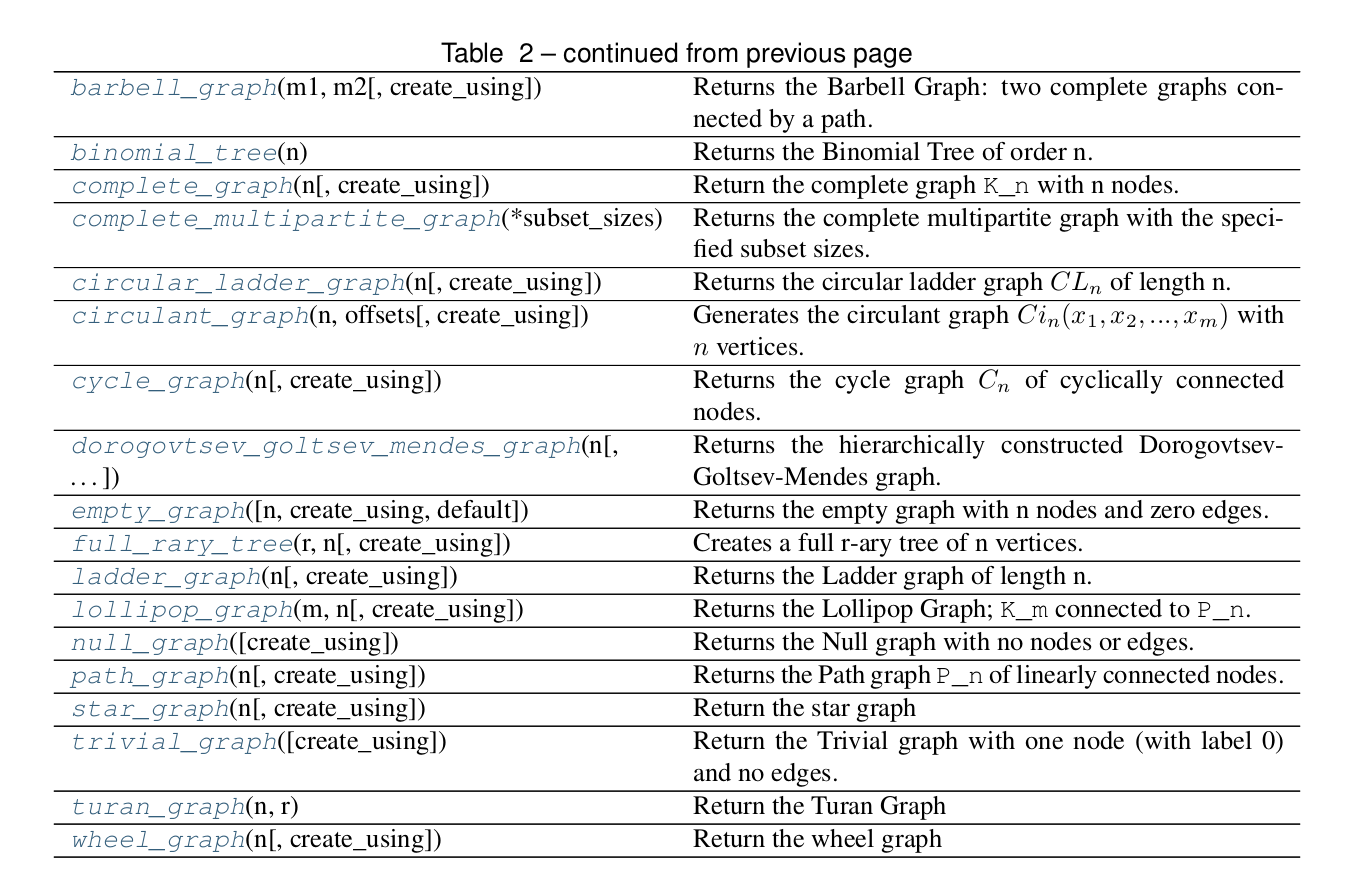

## 随机图生成
networkx提供了以下几种随机图的生成方式
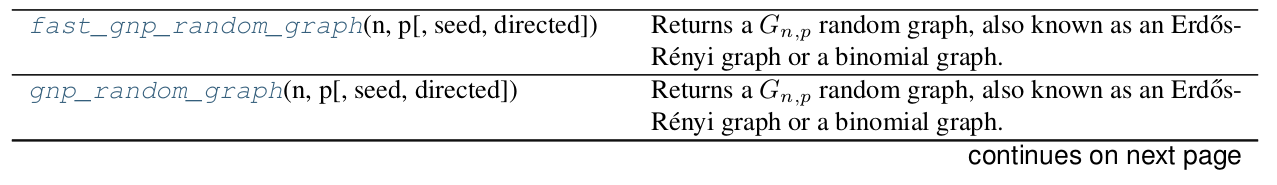
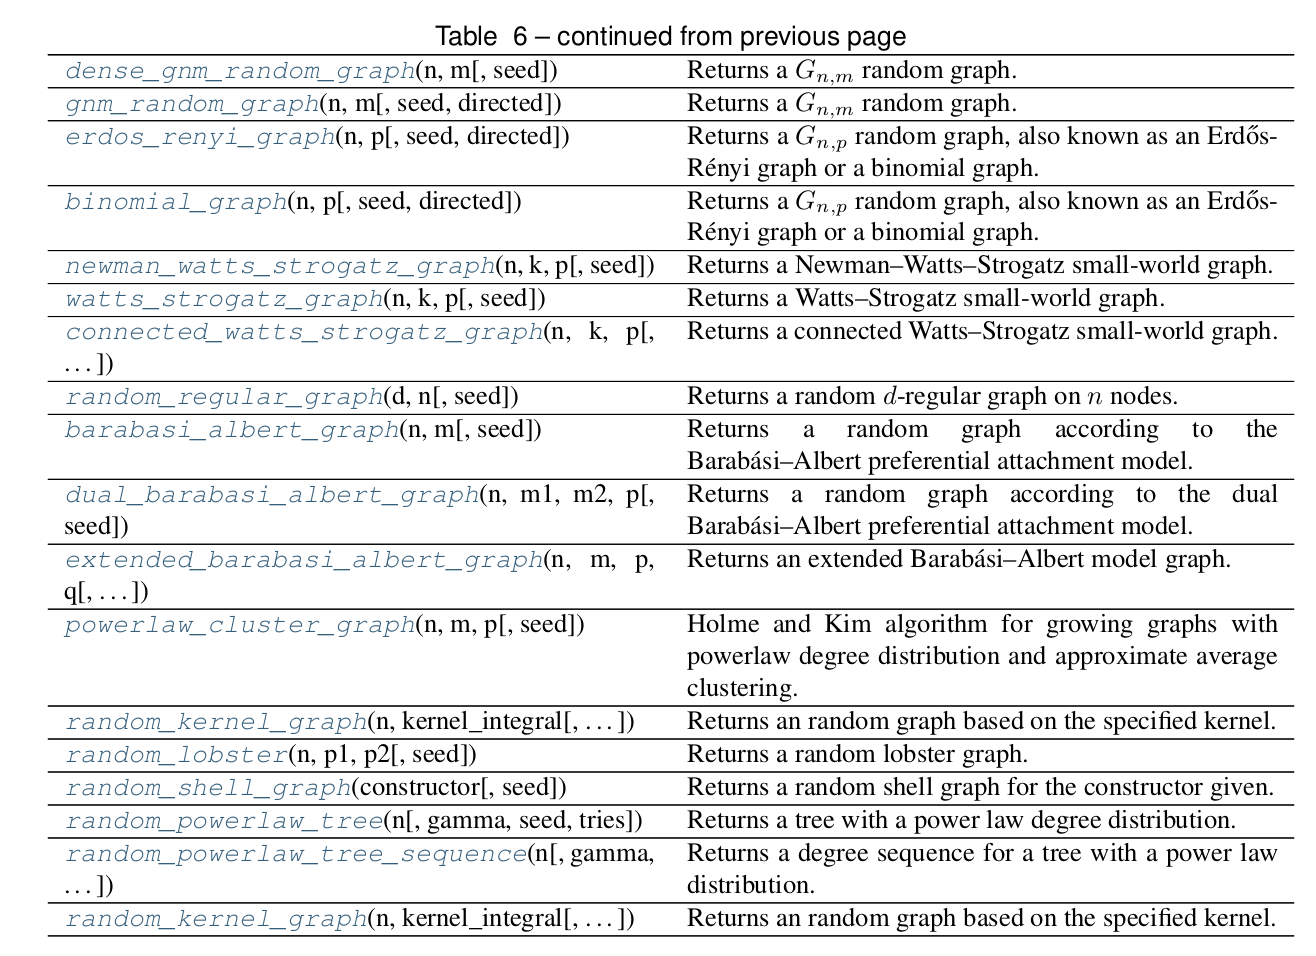

### 小世界网络结构图生成
networkx提供了三种小世界网络生成算法
1. `newman_watts_strogatz_graph(n, k, p, seed=None)`
2. `watts_strogatz_graph(n, k, p, seed=None)`
3. `connected_watts_strogatz_graph(n, k, p, tries=100, seed=None)`

参数中`seed`的定义：


### Barabási–Albert preferential attachment model
A graph of n nodes is grown by attaching new nodes each with m edges that are preferentially attached to existing nodes with high degree.
```python
barabasi_albert_graph(n, m, seed=None)  #the value of m should satisfy 1<=m<n
```


## social networks生成
networkx提供了一些著名的社会网络生成算法
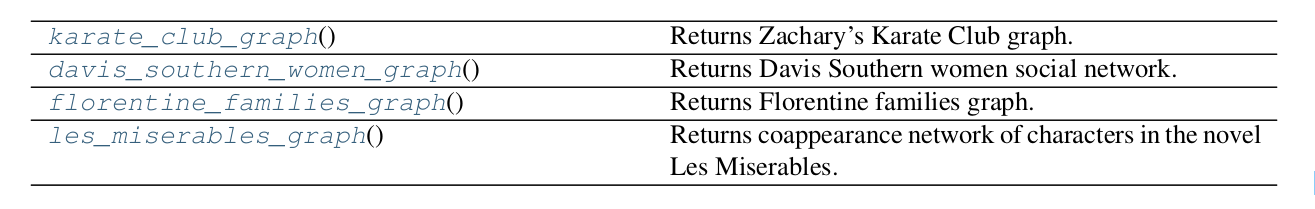


## 导入已有网络数据生成图
1. 可以通过导入`pandas`中的边集合来生成图

In [37]:
import networkx as nx
?nx.from_pandas_edgelist

Signature:
nx.from_pandas_edgelist(
    df,
    source='source',
    target='target',
    edge_attr=None,
    create_using=None,
    edge_key=None,
)
Docstring:
Returns a graph from Pandas DataFrame containing an edge list.

The Pandas DataFrame should contain at least two columns of node names and
zero or more columns of edge attributes. Each row will be processed as one
edge instance.

Note: This function iterates over DataFrame.values, which is not
guaranteed to retain the data type across columns in the row. This is only
a problem if your row is entirely numeric and a mix of ints and floats. In
that case, all values will be returned as floats. See the
DataFrame.iterrows documentation for an example.

Parameters
----------
df : Pandas DataFrame
    An edge list representation of a graph

source : str or int
    A valid column name (string or integer) for the source nodes (for the
    directed case).

target : str or int
    A valid column name (string or integer) for the target node

In [40]:
>>> import pandas as pd
>>> pd.options.display.max_columns = 20
>>> import numpy as np
>>> rng = np.random.RandomState(seed=5)
>>> ints = rng.randint(1, 11, size=(3, 2))
>>> a = ["A", "B", "C"]
>>> b = ["D", "A", "E"]
>>> df = pd.DataFrame(ints, columns=["weight", "cost"])
>>> df[0] = a #新增两列
>>> df["b"] = b 
>>> df[["weight", "cost", 0, "b"]]
>>> G = nx.from_pandas_edgelist(df, 0, "b", ["weight", "cost"]) #将列0和`b`分别作为起始点，`weight`,`cost`作为边属性
>>> G["E"]["C"]["weight"]
>>> G["E"]["C"]["cost"]

weight  cost  0  b
0       4     7  A  D
1       7     1  B  A
2      10     9  C  E

10

9

In [41]:
>>> edges = pd.DataFrame(
...     {
...         "source": [0, 1, 2],
...         "target": [2, 2, 3],
...         "weight": [3, 4, 5],
...         "color": ["red", "blue", "blue"],
...     }
... )
>>> G = nx.from_pandas_edgelist(edges, edge_attr=True)
>>> G[0][2]["color"]
G[0][2]['weight']
edges

'red'

3

source  target  weight color
0       0       2       3   red
1       1       2       4  blue
2       2       3       5  blue

In [42]:
>>> edges = pd.DataFrame(
...     {
...         "source": [0, 1, 2, 0],
...         "target": [2, 2, 3, 2],
...         "my_edge_key": ["A", "B", "C", "D"],
...         "weight": [3, 4, 5, 6],
...         "color": ["red", "blue", "blue", "blue"],
...     }
... )
>>> G = nx.from_pandas_edgelist(
...     edges,
...     edge_key="my_edge_key",
...     edge_attr=["weight", "color"],
...     create_using=nx.MultiGraph(),
... )
>>> G[0][2]
edges

AtlasView({'A': {'weight': 3, 'color': 'red'}, 'D': {'weight': 6, 'color': 'blue'}})

source  target my_edge_key  weight color
0       0       2           A       3   red
1       1       2           B       4  blue
2       2       3           C       5  blue
3       0       2           D       6  blue

In [73]:
import numpy as np
np.random.rand(4,1)

array([[3.31346798e-01],
       [7.72421256e-02],
       [1.14582759e-04],
       [5.68738574e-01]])

In [71]:
?nx.draw_networkx

Signature: nx.draw_networkx(G, pos=None, arrows=True, with_labels=True, **kwds)
Docstring:
Draw the graph G using Matplotlib.

Draw the graph with Matplotlib with options for node positions,
labeling, titles, and many other drawing features.
See draw() for simple drawing without labels or axes.

Parameters
----------
G : graph
   A networkx graph

pos : dictionary, optional
   A dictionary with nodes as keys and positions as values.
   If not specified a spring layout positioning will be computed.
   See :py:mod:`networkx.drawing.layout` for functions that
   compute node positions.

arrows : bool, optional (default=True)
   For directed graphs, if True draw arrowheads.
   Note: Arrows will be the same color as edges.

arrowstyle : str, optional (default='-|>')
    For directed graphs, choose the style of the arrowsheads.
    See :py:class: `matplotlib.patches.ArrowStyle` for more
    options.

arrowsize : int, optional (default=10)
   For directed graphs, choose the size of the arrow 

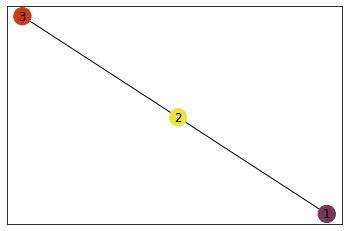

In [82]:
color = np.random.rand(3,3)
nx.draw_networkx(G, node_color = color)

# Python中的随机RANDOMNESS
They each provide a global default instance of their generator that is shared by all programs in a single session.

当想实现对生成随机数进行控制，即要求可复现的时候，需要添加随机数种子`seed`。Setting the state of the two global RNGs is as simple setting the seed of each RNG to an arbitrary integer:
```python
#通过设定全局的随机数种子，对于numpy的随机库和Python的随机库而言，在不更改的情况下，都是相同的
import random
random.seed(246)  # or any integer
import numpy
numpy.random.seed(4812)
```
当然，也可以通过对某个具体的涉及到随机的函数给定`seed`。实现`局部的`随机数生成

This argument is called seed, but determines more than the seed of the RNG. It tells the function which RNG package to use, and
whether to use a global or local RNG.
```python


from networkx import path_graph, random_layout
G = path_graph(9)
pos = random_layout(G, seed=None) # use (either) global default RNG
pos = random_layout(G, seed=42) # local RNG just for this call
pos = random_layout(G, seed=numpy.random) # use numpy global RNG
random_state = numpy.random.RandomState(42)
pos = random_layout(G, seed=random_state) # use/reuse your own RNG
```
To summarize, you can easily ignore the seed argument and use the global RNGs. You can specify to use only the numpy global RNG with seed=numpy.random. You can use a local RNG by providing an integer seed value. And you can provide your own numpy RNG, reusing it for all functions. It is easier to use numpy RNGs if you want a single RNG for your computations.

# community detection

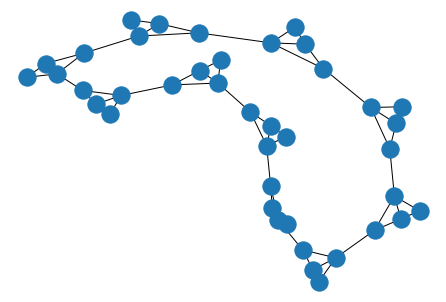

In [7]:
# 导入真实的社会网络
G = nx.connected_caveman_graph(10, 4)
nx.draw(G)

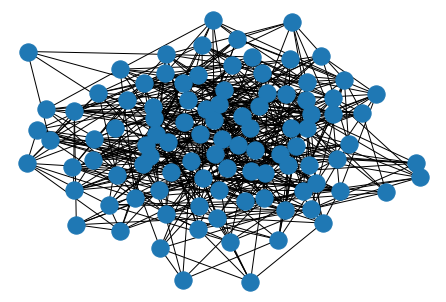

In [9]:
G = nx.gaussian_random_partition_graph(100, 10, 10, 0.25, 0.1)
nx.draw(G)